In [1]:
#################################################################################################
# Import necessary libraries
#################################################################################################
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from time import time
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew

In [2]:
#################################################################################################
# Import data
#################################################################################################
Data_DF = pd.read_excel("Concrete_Compressive_Strength_Dataset.xlsx")

In [3]:
#################################################################################################
# Prepare engineered features
#################################################################################################
Data_DF['W/B Ratio'] = Data_DF['Water']/(Data_DF['Cement'] + Data_DF['Blast Furnace Slag'] + Data_DF['Fly Ash'])

Data_DF['BFS/W Ratio'] = Data_DF['Blast Furnace Slag']/Data_DF['Water']

Data_DF['FASH/W Ratio'] = Data_DF['Fly Ash']/Data_DF['Water']

Data_DF['CA/B Ratio'] = Data_DF['Coarse Aggregate']/(Data_DF['Cement'] + Data_DF['Blast Furnace Slag'] + Data_DF['Fly Ash'])

Data_DF['CA/FA Ratio'] = Data_DF['Coarse Aggregate']/Data_DF['Fine Aggregate']

In [4]:
#################################################################################################
# Create an array of features for model development
#################################################################################################
Feature_Names = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Fine Aggregate',
                 'Age','W/B Ratio', 'BFS/W Ratio', 'FASH/W Ratio', 'CA/B Ratio', 'CA/FA Ratio']


X = Data_DF[Feature_Names].to_numpy()
y = Data_DF['Compressive Strength'].to_numpy()

In [5]:
#################################################################################################
# Split data for training and testing
#################################################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=7)

In [6]:
#model = XGBRegressor(objective ='reg:squarederror')

model = XGBRegressor(objective ='reg:squarederror', n_estimators=5745, max_depth=5, learning_rate=0.00875)

model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.00875, max_depth=5, n_estimators=5745)

In [7]:
# Novel Concrete

dict = {'Cement':[250,275,300,325,350], 'Blast Furnace Slag':[75,75,175,75,50], 'Fly Ash':[75,50,25,0,0], 
        'Water':[200,180,160,140,120], 'Superplasticizer':[12,12,11,12,12], 'Coarse Aggregate':[1060,1060,1040,1060,1060],
        'Fine Aggregate':[845,845,760,845,845], 'Age':[150,100,100,28,28]} 
  
NC_DF = pd.DataFrame(dict)

NC_DF['W/B Ratio'] = NC_DF['Water']/(NC_DF['Cement'] + NC_DF['Blast Furnace Slag'] + NC_DF['Fly Ash'])

NC_DF['BFS/W Ratio'] = NC_DF['Blast Furnace Slag']/NC_DF['Water']

NC_DF['FASH/W Ratio'] = NC_DF['Fly Ash']/NC_DF['Water']

NC_DF['CA/B Ratio'] = NC_DF['Coarse Aggregate']/(NC_DF['Cement'] + NC_DF['Blast Furnace Slag'] + NC_DF['Fly Ash'])

NC_DF['CA/FA Ratio'] = NC_DF['Coarse Aggregate']/NC_DF['Fine Aggregate']

X_Novel = NC_DF[Feature_Names].to_numpy()

NC_DF.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,W/B Ratio,BFS/W Ratio,FASH/W Ratio,CA/B Ratio,CA/FA Ratio
0,250,75,75,200,12,1060,845,150,0.50,0.375000,0.375000,2.65,1.254438
1,275,75,50,180,12,1060,845,100,0.45,0.416667,0.277778,2.65,1.254438
2,300,175,25,160,11,1040,760,100,0.32,1.093750,0.156250,2.08,1.368421
3,325,75,0,140,12,1060,845,28,0.35,0.535714,0.000000,2.65,1.254438
4,350,50,0,120,12,1060,845,28,0.30,0.416667,0.000000,2.65,1.254438


In [8]:
model.predict(X_Novel)

array([42.94753 , 52.4687  , 72.73984 , 63.867226, 61.89422 ],
      dtype=float32)

In [9]:
#################################################################################################
# Make predictions on testing data and test model accuracy
#################################################################################################

Y_Test_Pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,Y_Test_Pred))
RSQ = r2_score(y_test,Y_Test_Pred)
MAPE = np.mean(np.abs((y_test - Y_Test_Pred) / y_test)) * 100
MAE = np.mean(np.abs(y_test - Y_Test_Pred))
print("############ Model Accuracy ############")
print("RMSE: %0.3f" % rmse)
print("R-squared: %0.3f" % RSQ)
print("MAPE: %0.3f" % MAPE)
print("MAE: %0.3f" % MAE)
print("########################################")
print(" ")

############ Model Accuracy ############
RMSE: 2.649
R-squared: 0.975
MAPE: 7.403
MAE: 1.897
########################################
 


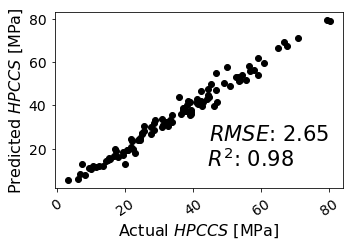

In [10]:
fig, ax1 = plt.subplots(1,1, figsize=(5,3.5))
# ###################################################################################################

ax1.scatter(y_test,Y_Test_Pred, 
            marker='o', color = 'black')

ax1.text(0.95, 0.25, ("$RMSE$: %0.02f" % rmse),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=21)

ax1.text(0.83, 0.1, ("$R^2$: %0.02f" % RSQ),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=21)


ax1.set_xlabel('Actual $HPCCS$ [MPa]', fontsize = 16)
ax1.tick_params(axis = "x", labelsize = 14, rotation=34)
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('Predicted $HPCCS$ [MPa]', fontsize = 16)
ax1.tick_params(axis = "y", labelsize = 14)
ax1.yaxis.set_tick_params(pad=5)


plt.tight_layout(pad=1.2)
fig.savefig('Scatter_Plot_With_Tuning.jpg', format='jpeg', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, '')

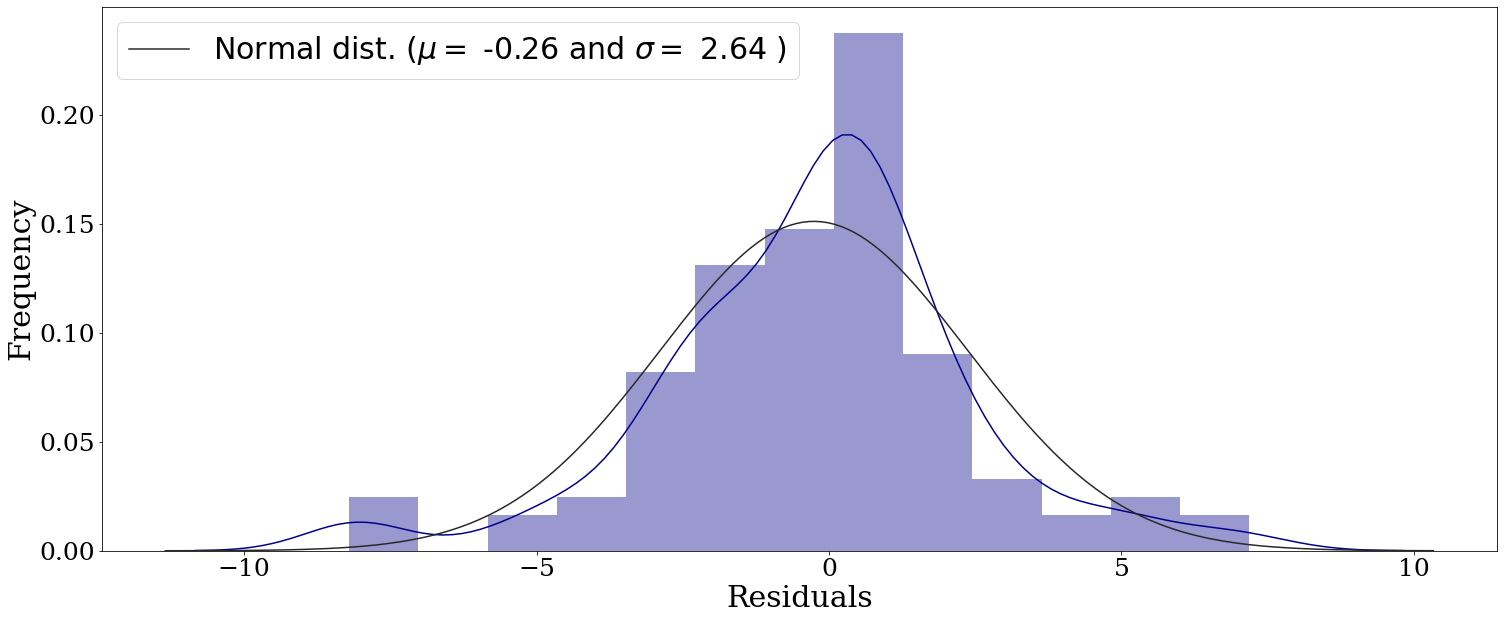

In [11]:
residuals = (y_test-Y_Test_Pred)
fig = plt.figure(figsize=(25,10),dpi=72)
sns.distplot(residuals, fit = norm, color='darkblue')
(mu, sigma) = norm.fit(residuals)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best', fontsize=30)
plt.xlabel('Residuals', fontsize=30, fontname='Serif')
plt.ylabel('Frequency', fontsize=30, fontname='Serif')
plt.xticks(fontsize=25, fontname='Serif')
plt.yticks(fontsize=25, fontname='Serif')
plt.figaspect(1.)
plt.title('')
#plt.savefig('Residual Distribution No Tuning.pdf')

In [12]:
import shap
shap.initjs()

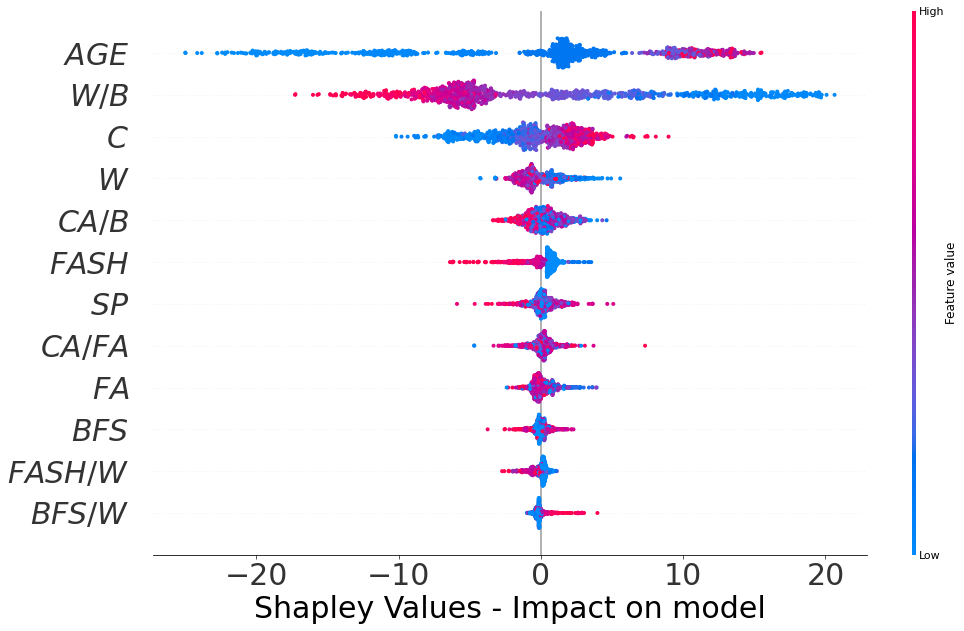

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Data_DF[Feature_Names].to_numpy())

Features1 = ['$C$','$BFS$','$FASH$','$W$','$SP$','$FA$','$AGE$','$W/B$','$BFS/W$','$FASH/W$','$CA/B$','$CA/FA$']

df_shap_plot =[]
df_shap_plot = Data_DF[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer',
                        'Fine Aggregate','Age','W/B Ratio','BFS/W Ratio','FASH/W Ratio','CA/B Ratio', 'CA/FA Ratio']].copy()

df_shap_plot.rename(columns = {'Cement'   : '$C$',     \
                               'Blast Furnace Slag'   : '$BFS$',     \
                               'Fly Ash'  : '$FASH$',    \
                               'Water' : '$W$', \
                               'Superplasticizer'  : '$SP$', \
                              'Fine Aggregate' : '$FA$' , \
                             'Age' : '$AGE$' , \
                             'W/B Ratio' : '$W/B$' , \
                             'BFS/W Ratio' : '$BFS/W$'  , \
                             'FASH/W Ratio' : '$FASH/W$'  , \
                             'CA/B Ratio' : '$CA/B$'  , \
                             'CA/FA Ratio' : '$CA/FA$'}, inplace = True)

shap.summary_plot(shap_values, df_shap_plot[Features1].to_numpy(), Features1, plot_size=(16,10), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.savefig('Feature Importance - SHAP.pdf', format='pdf', dpi=300, bbox_inches ='tight')

In [15]:
shap.force_plot(explainer.expected_value, shap_values[0,:], Data_DF[Feature_Names].iloc[0,:],text_rotation=90)

In [16]:
#shap.force_plot(explainer.expected_value, shap_values, df_shap_plot[Features1].to_numpy())

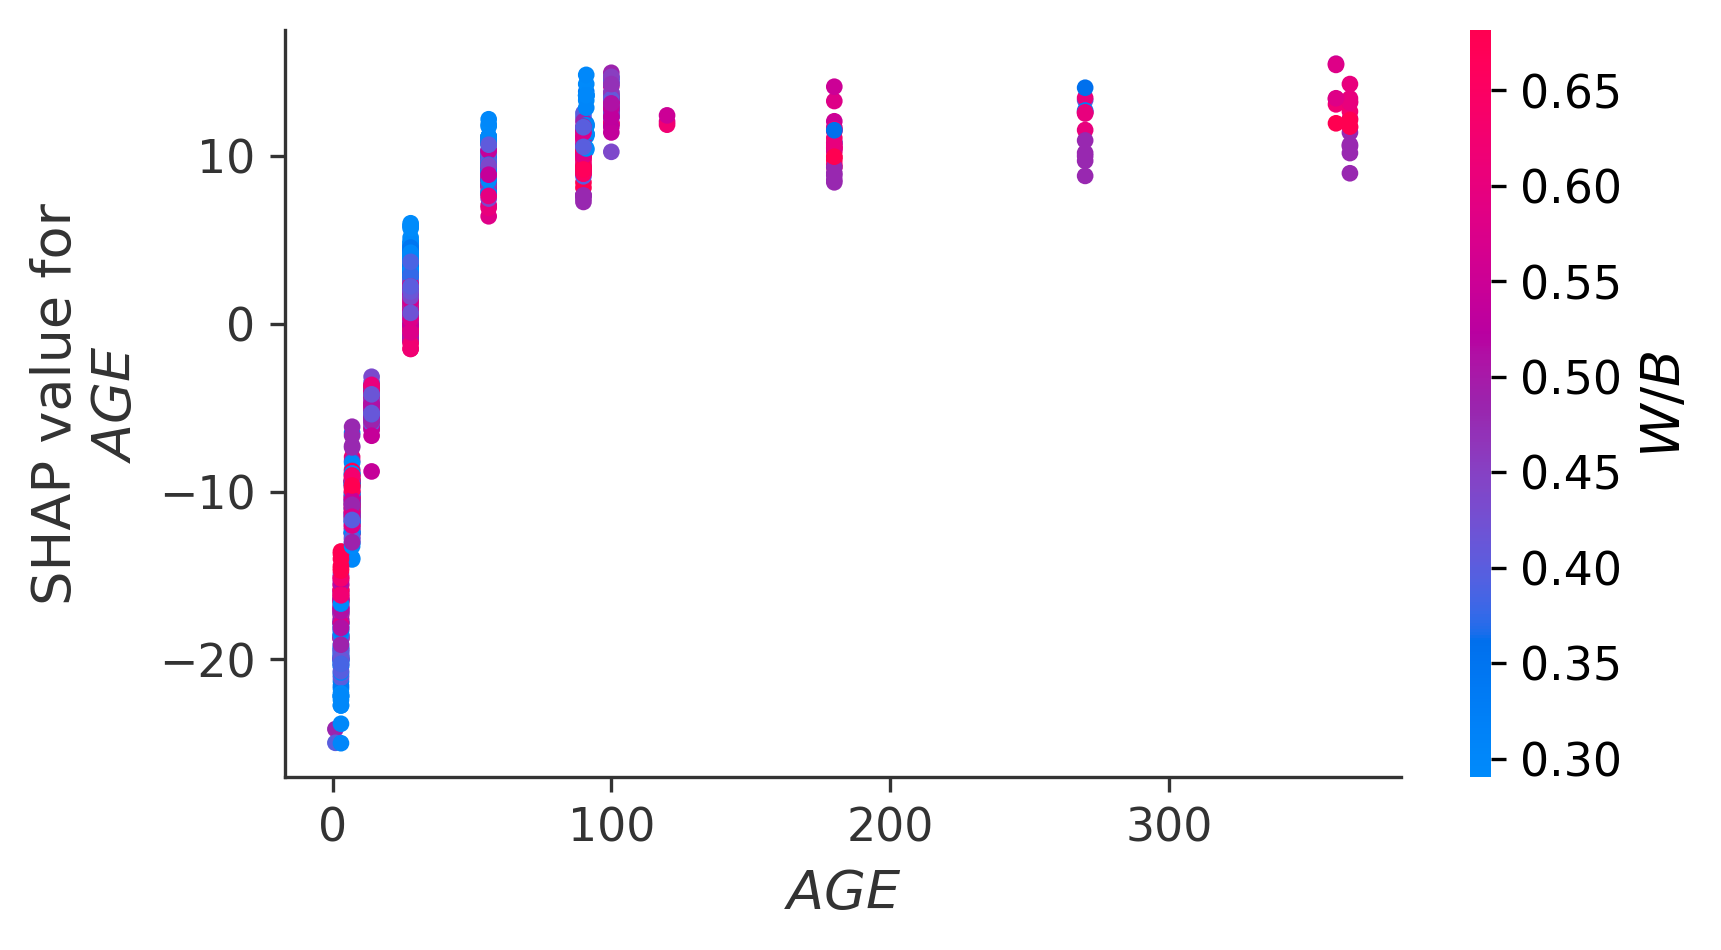

In [17]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

shap.dependence_plot("$AGE$",shap_values, df_shap_plot[Features1].to_numpy(),Features1, ax=ax1, show=False)

plt.savefig('Feature Interaction - Age vs. WB.jpg', format='jpeg', dpi=300, bbox_inches ='tight')

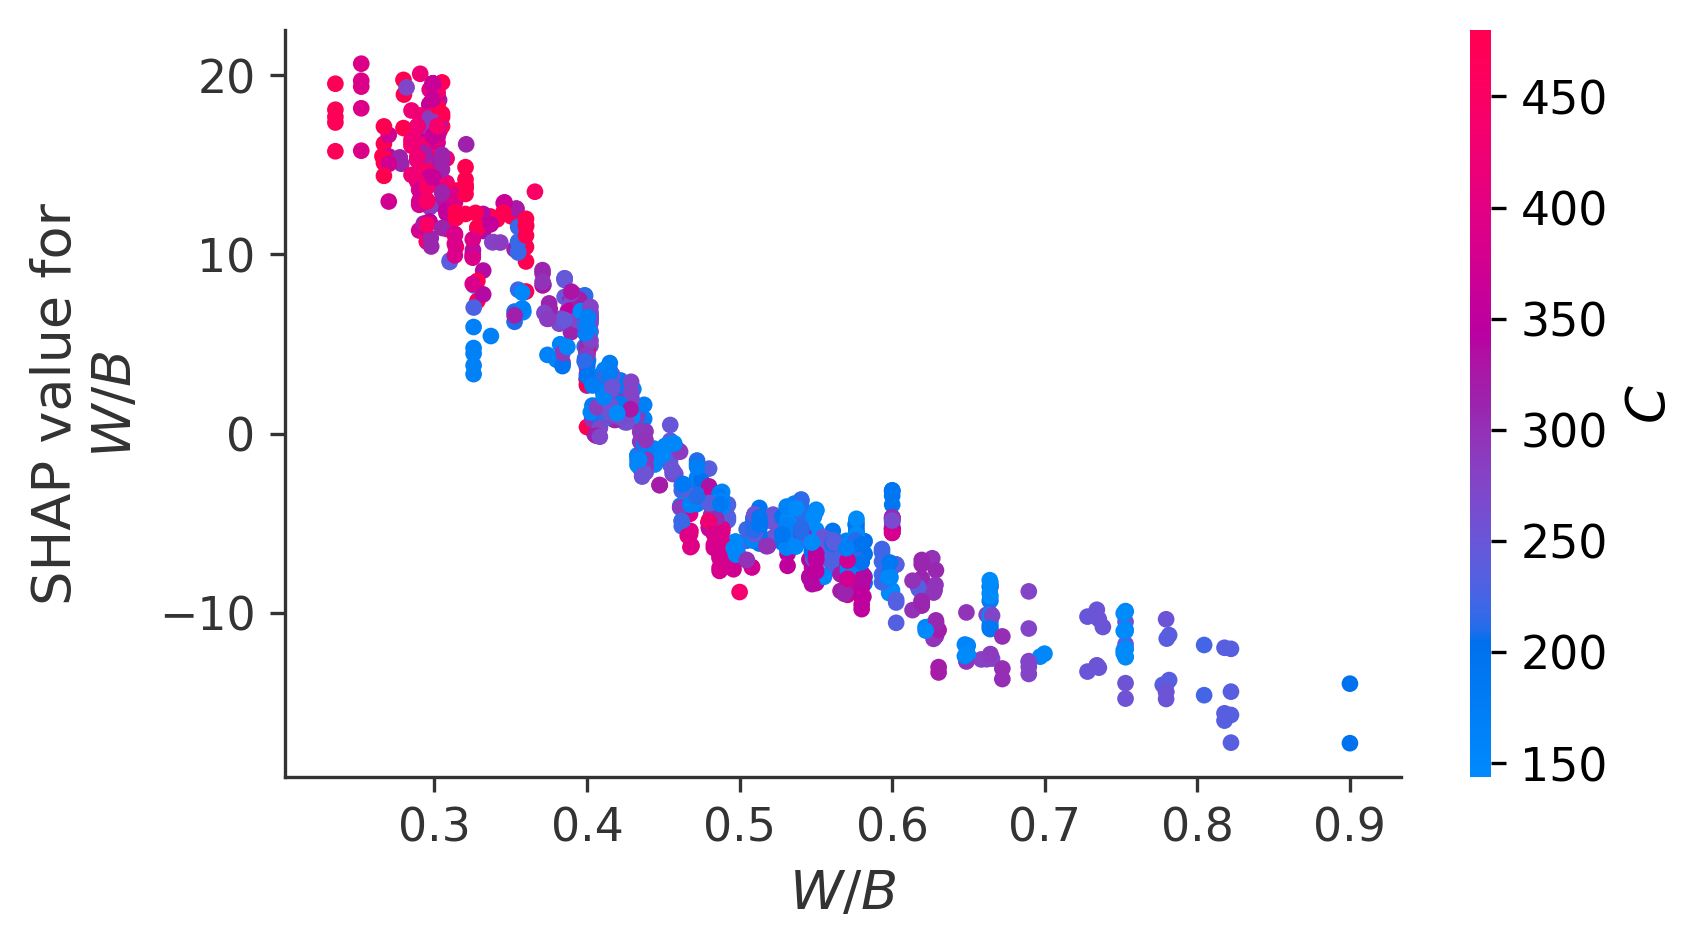

In [18]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

shap.dependence_plot("$W/B$",shap_values, df_shap_plot[Features1].to_numpy(),Features1, ax=ax1, show=False)

plt.savefig('Feature Interaction - WB vs. C.jpg', format='jpeg', dpi=300, bbox_inches ='tight')

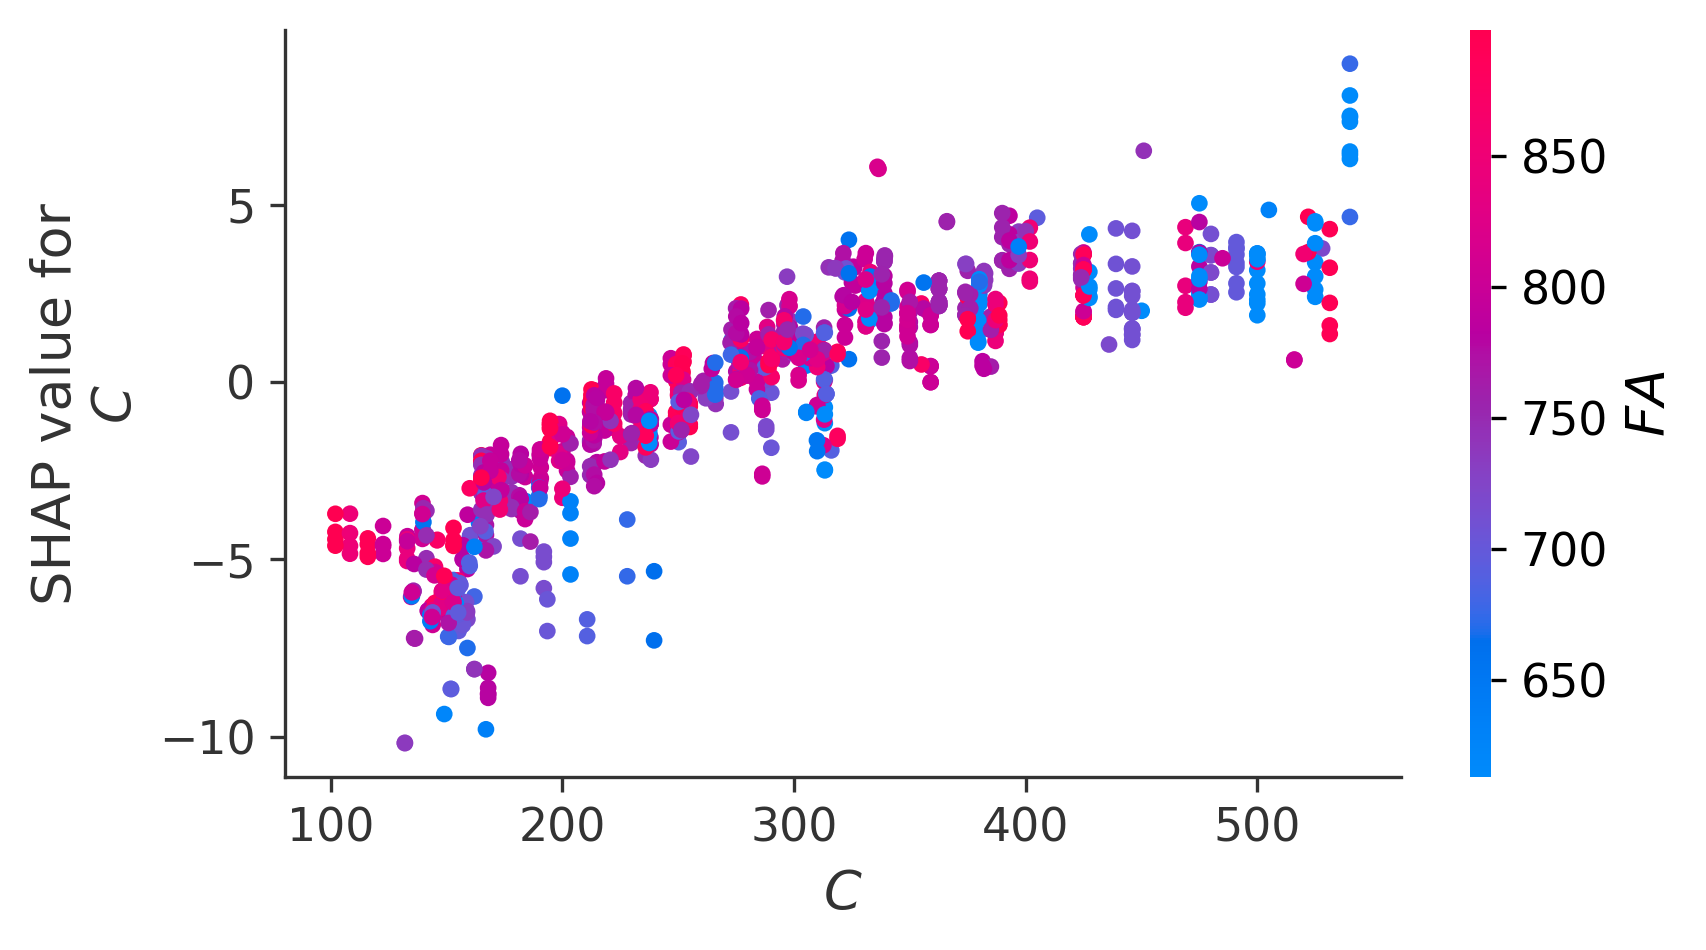

In [19]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

shap.dependence_plot("$C$",shap_values, df_shap_plot[Features1].to_numpy(),Features1, ax=ax1, show=False)
plt.savefig('Feature Interaction - C vs. FA.jpg', format='jpeg', dpi=300, bbox_inches ='tight')

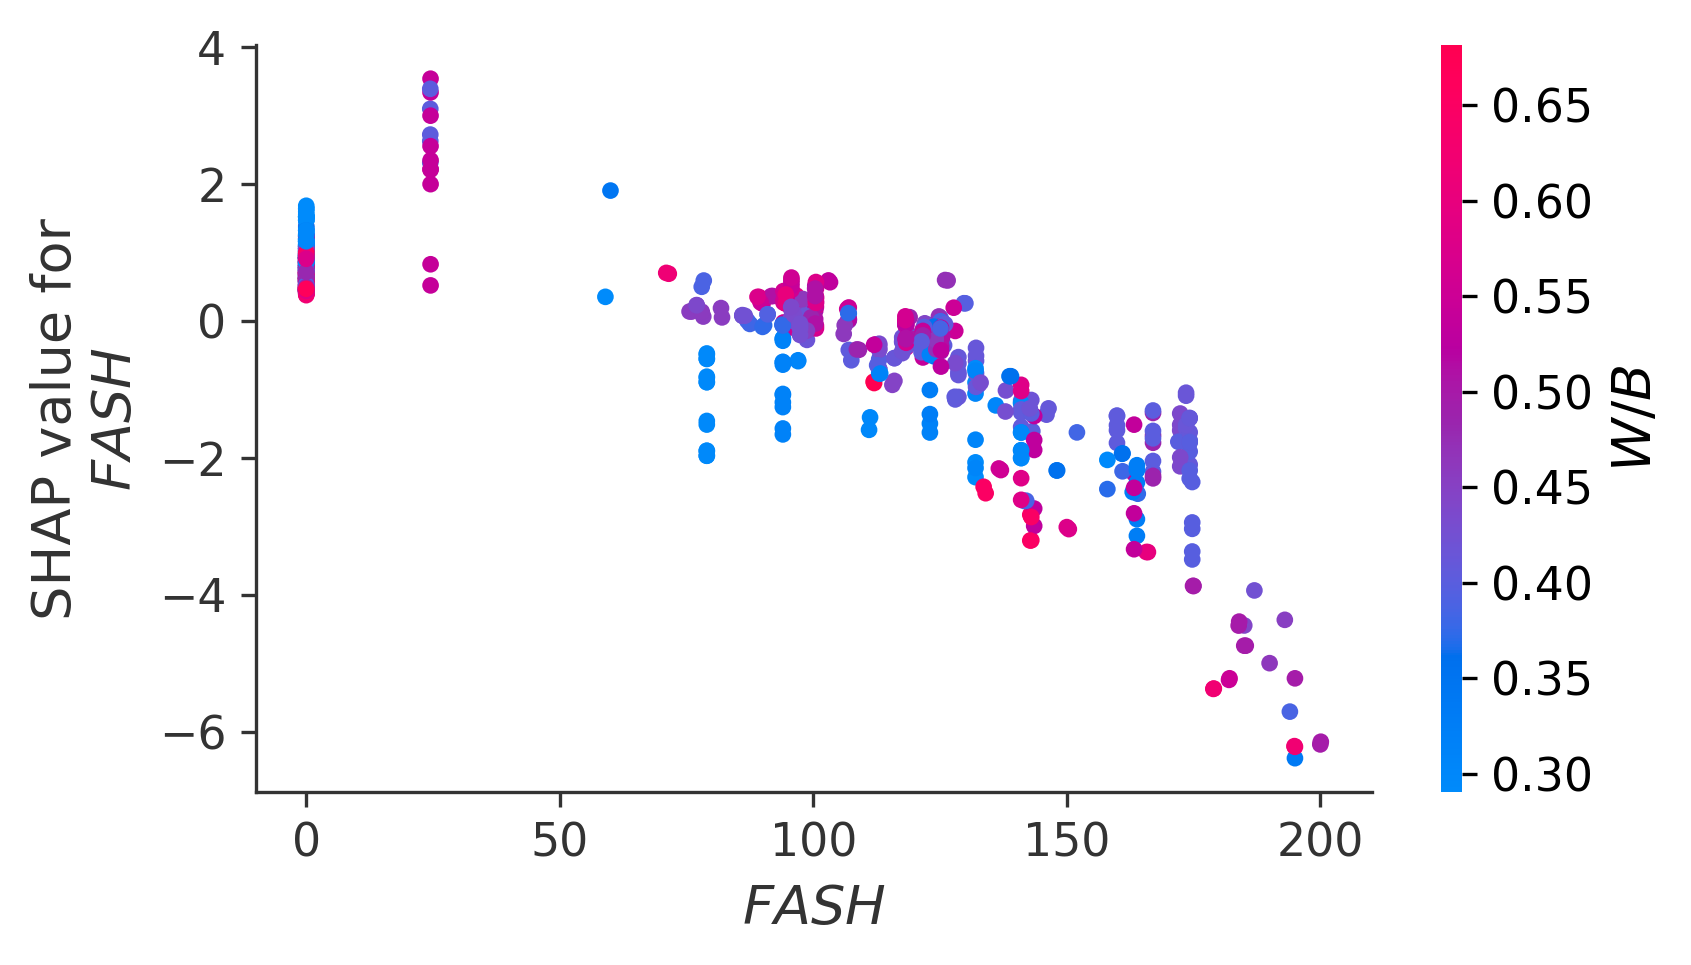

In [20]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

shap.dependence_plot("$FASH$",shap_values, df_shap_plot[Features1].to_numpy(),Features1, ax=ax1, show=False)
plt.savefig('Feature Interaction - FASH vs. WB.jpg', format='jpeg', dpi=300, bbox_inches ='tight')

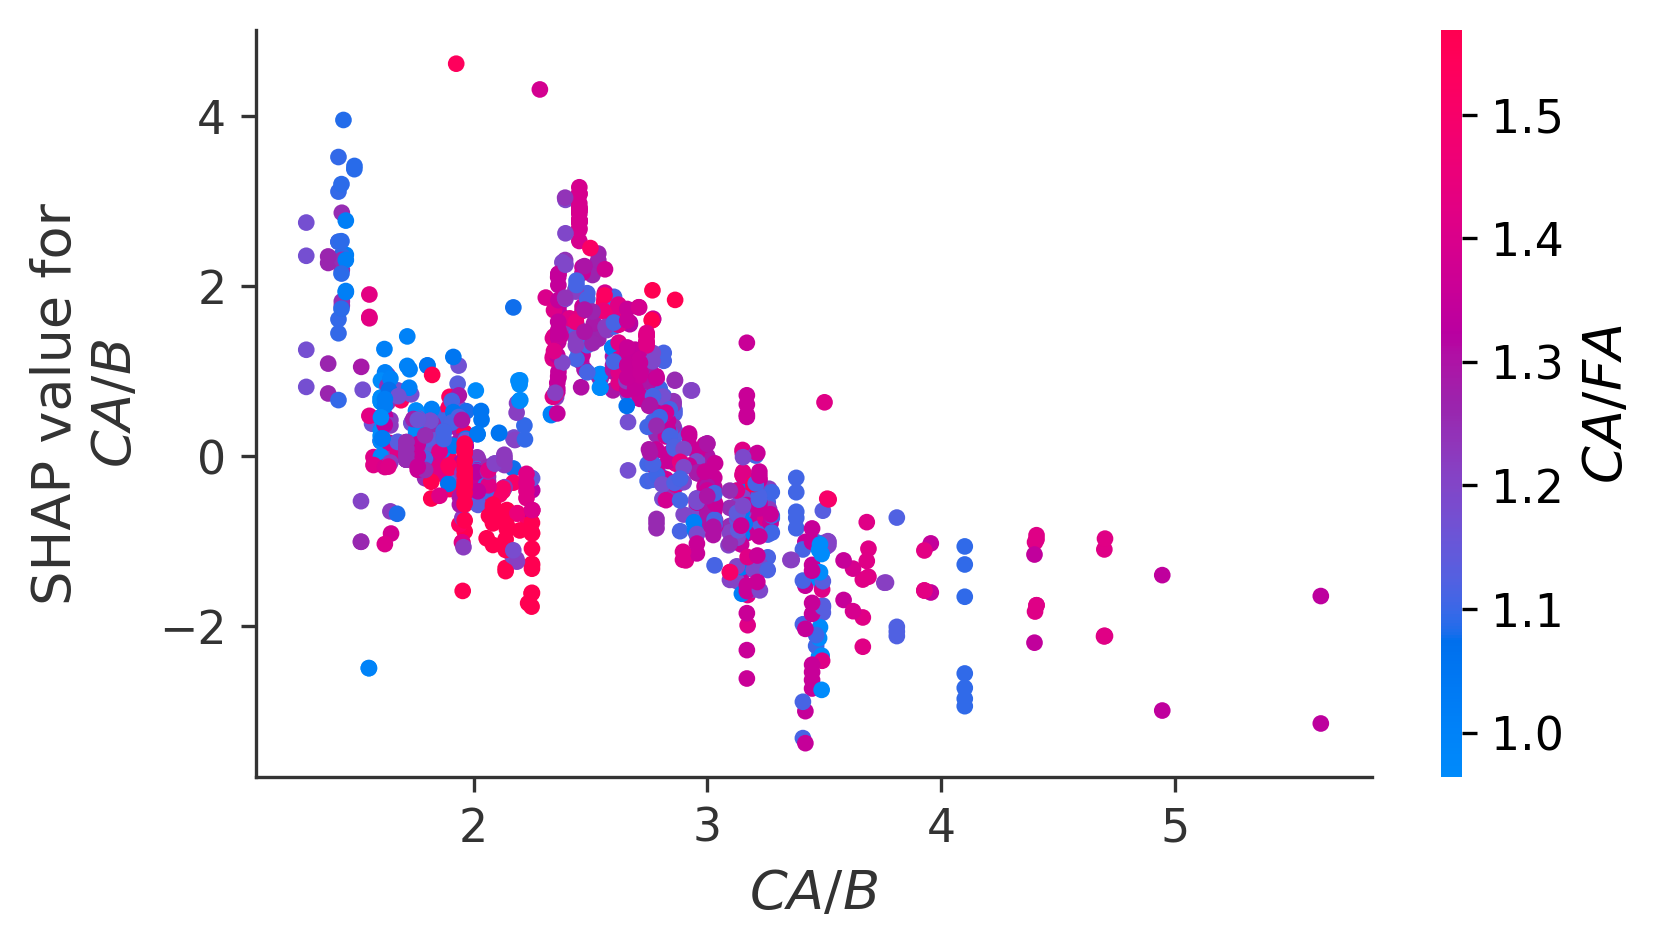

In [21]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

shap.dependence_plot("$CA/B$",shap_values, df_shap_plot[Features1].to_numpy(),Features1, ax=ax1, show=False)
plt.savefig('Feature Interaction - CAB vs. CAFA.jpg', format='jpeg', dpi=300, bbox_inches ='tight')

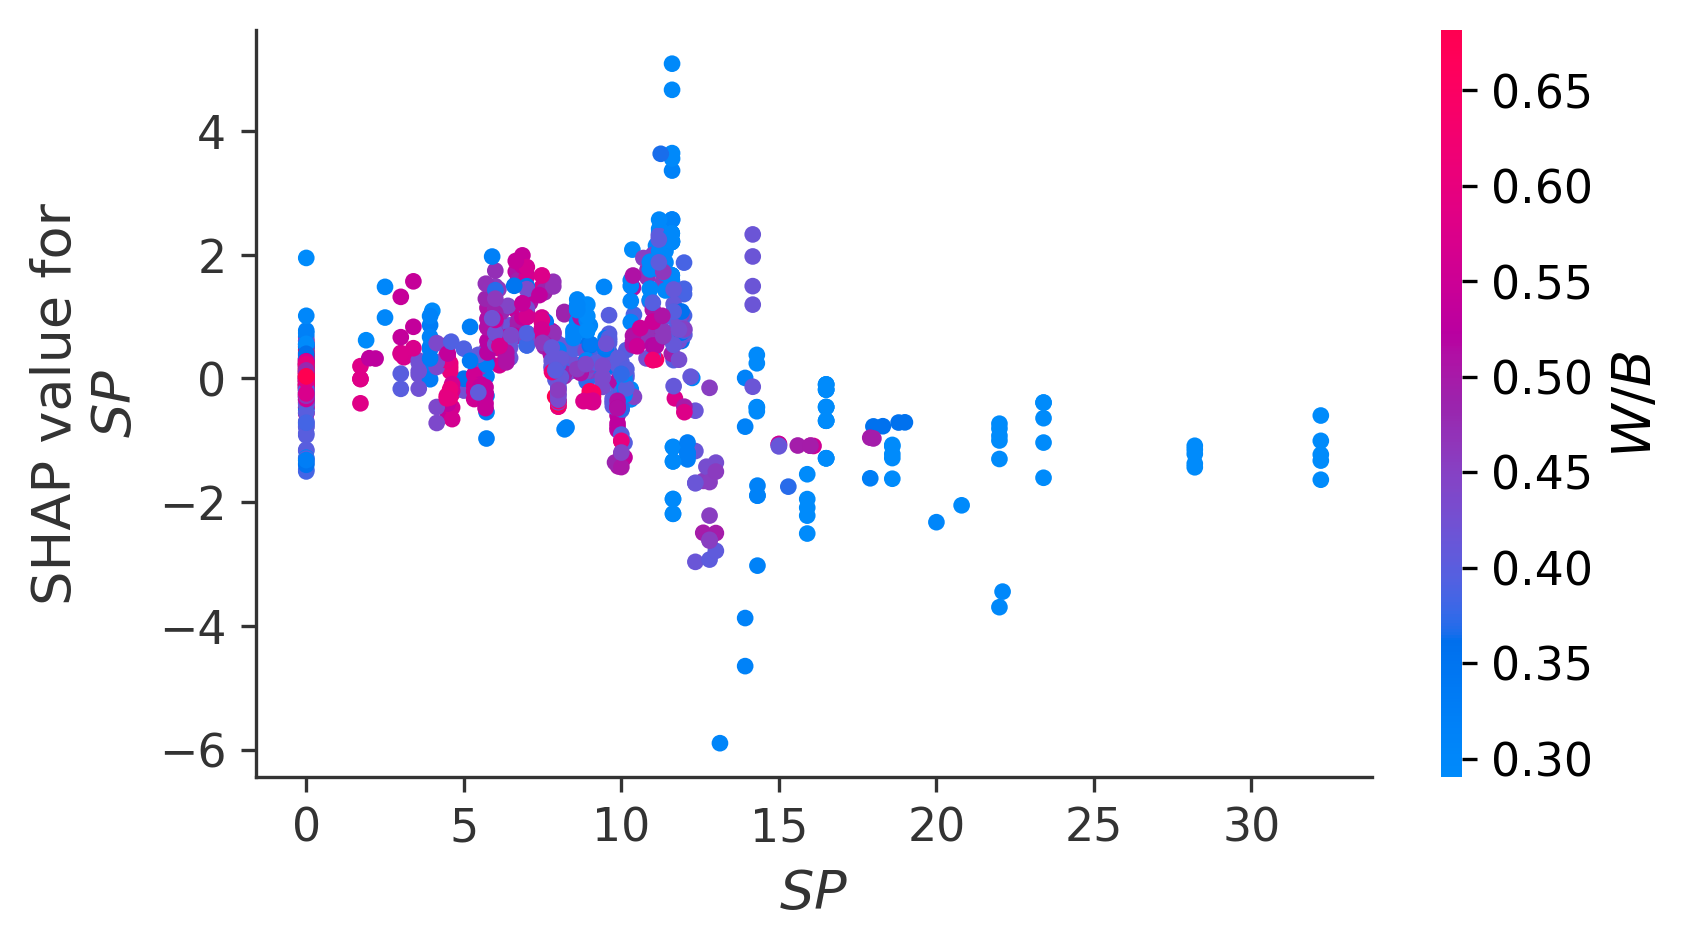

In [22]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

shap.dependence_plot("$SP$",shap_values, df_shap_plot[Features1].to_numpy(),Features1, ax=ax1, show=False)
plt.savefig('Feature Interaction - SP vs. WB.jpg', format='jpeg', dpi=300, bbox_inches ='tight')

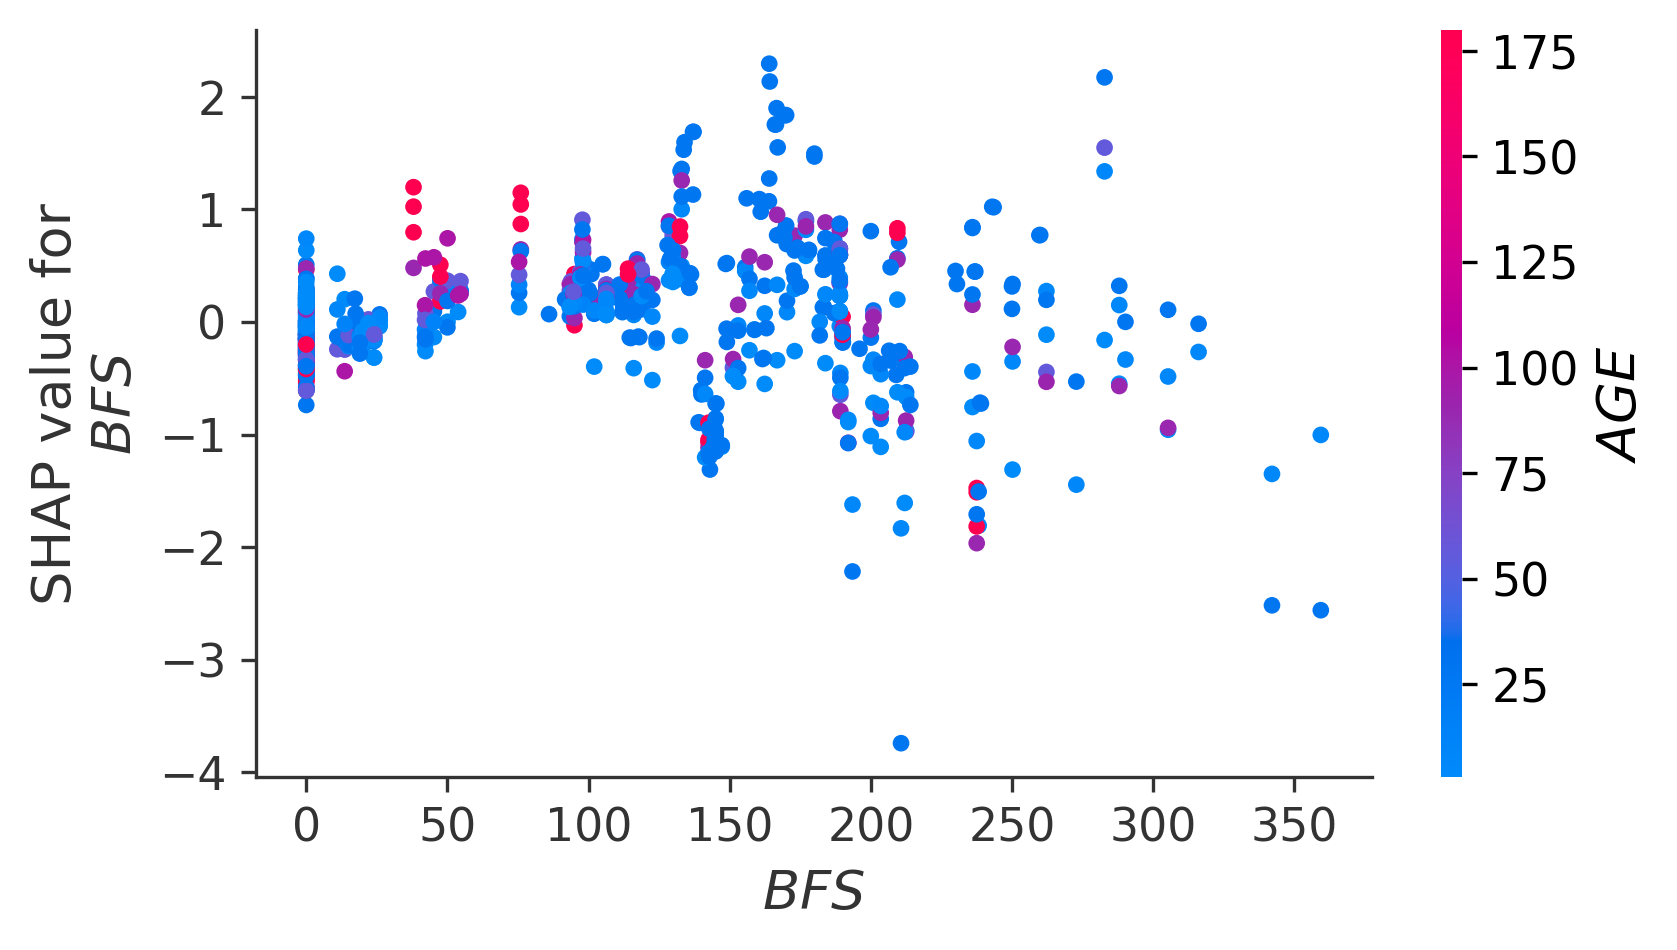

In [23]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

shap.dependence_plot("$BFS$",shap_values, df_shap_plot[Features1].to_numpy(),Features1, ax=ax1, show=False)
plt.savefig('Feature Interaction - BFS vs. Age.jpg', format='jpeg', dpi=300, bbox_inches ='tight')